<a href="https://colab.research.google.com/github/chimaOkwuokei/ISEND-PAU/blob/main/fastercnn_implementation_metal_surface_defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this part clones the github repo that contains the fast rcnn pipline
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1374, done.
remote: Counting objects: 100% (470/470), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 1374 (delta 349), reused 351 (delta 303), pack-reused 904
Receiving objects: 100% (1374/1374), 12.83 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (931/931), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

In [ ]:
#you'd drop a zipped file containing the data, and it has to be in the format is seen in the next cell
!unzip -q ../train_data_others_metal_surface_defects.zip -d custom_data


In [6]:
#this creates the custom yaml file that would be used for training

%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train_data_others_metal_surface_defects/images/train'
TRAIN_DIR_LABELS: 'custom_data/train_data_others_metal_surface_defects/labels/train'
VALID_DIR_IMAGES: 'custom_data/train_data_others_metal_surface_defects/images/val'
VALID_DIR_LABELS: 'custom_data/train_data_others_metal_surface_defects/labels/val'

# Class names.
CLASSES: [
    '__background__',
    'crazing', 'inclusion', 'patches'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 4

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


In [7]:
#the training part: trained with an epoch of 100 and a batch size of 3

!python train.py --data data_configs/custom_data.yaml --epochs 60 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 3
#0d7fc225d60e8c0f8ca2a8870971557bb2801693

2024-07-23 15:13:38.973507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 15:13:38.973573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 15:13:38.975012: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 15:13:38.982592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 15:13:40.112109: W tensorflow/compiler/tf2

In [8]:
#not really necessary
import matplotlib.pyplot as plt
import glob as glob

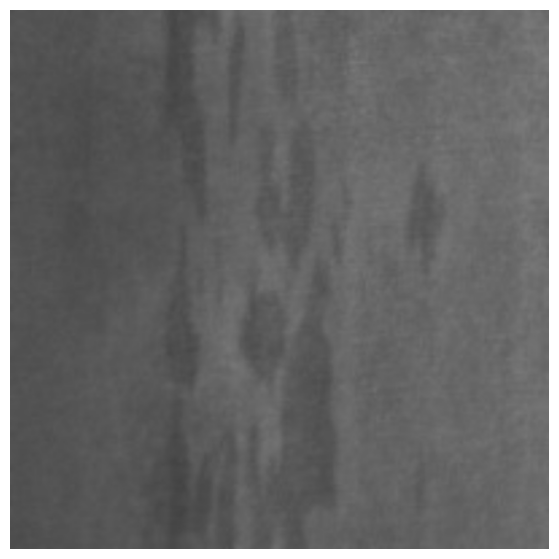

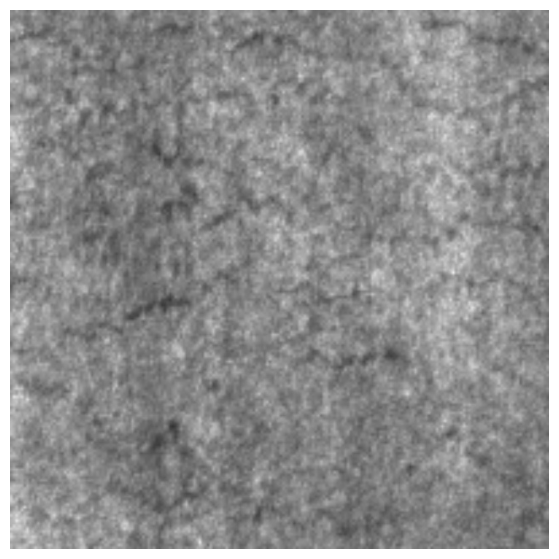

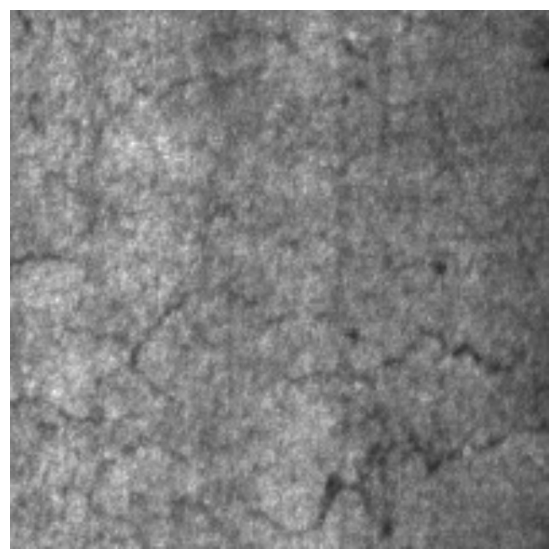

IndexError: list index out of range

<Figure size 1000x700 with 0 Axes>

In [9]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(5):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [10]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2024-07-23 15:27:24.598042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 15:27:24.598104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 15:27:24.599668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 15:27:24.607885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 15:27:25.913207: W tensorflow/compiler/tf2

In [16]:
#this performs inference on a given input image
!python inference.py --input /content/Pa_111.bmp --weights outputs/training/custom_training/best_model.pth --table --th 0.3


2024-07-23 15:40:27.802198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 15:40:27.802248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 15:40:27.803685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 15:40:27.810735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 15:40:29.050638: W tensorflow/compiler/tf2